In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Loan Status Prediction/train.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#Lets check the Categorical values

# Gender Column
df['Gender'] =  df['Gender'].map({'Male':0,'Female':1})

# Married column
df['Married'] = df['Married'].map({'No':0,'Yes':1})

# Loan_Status column
df['Loan_Status'] =df['Loan_Status'].map({'N':0,'Y':1})

In [ ]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,0.0,1.0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0


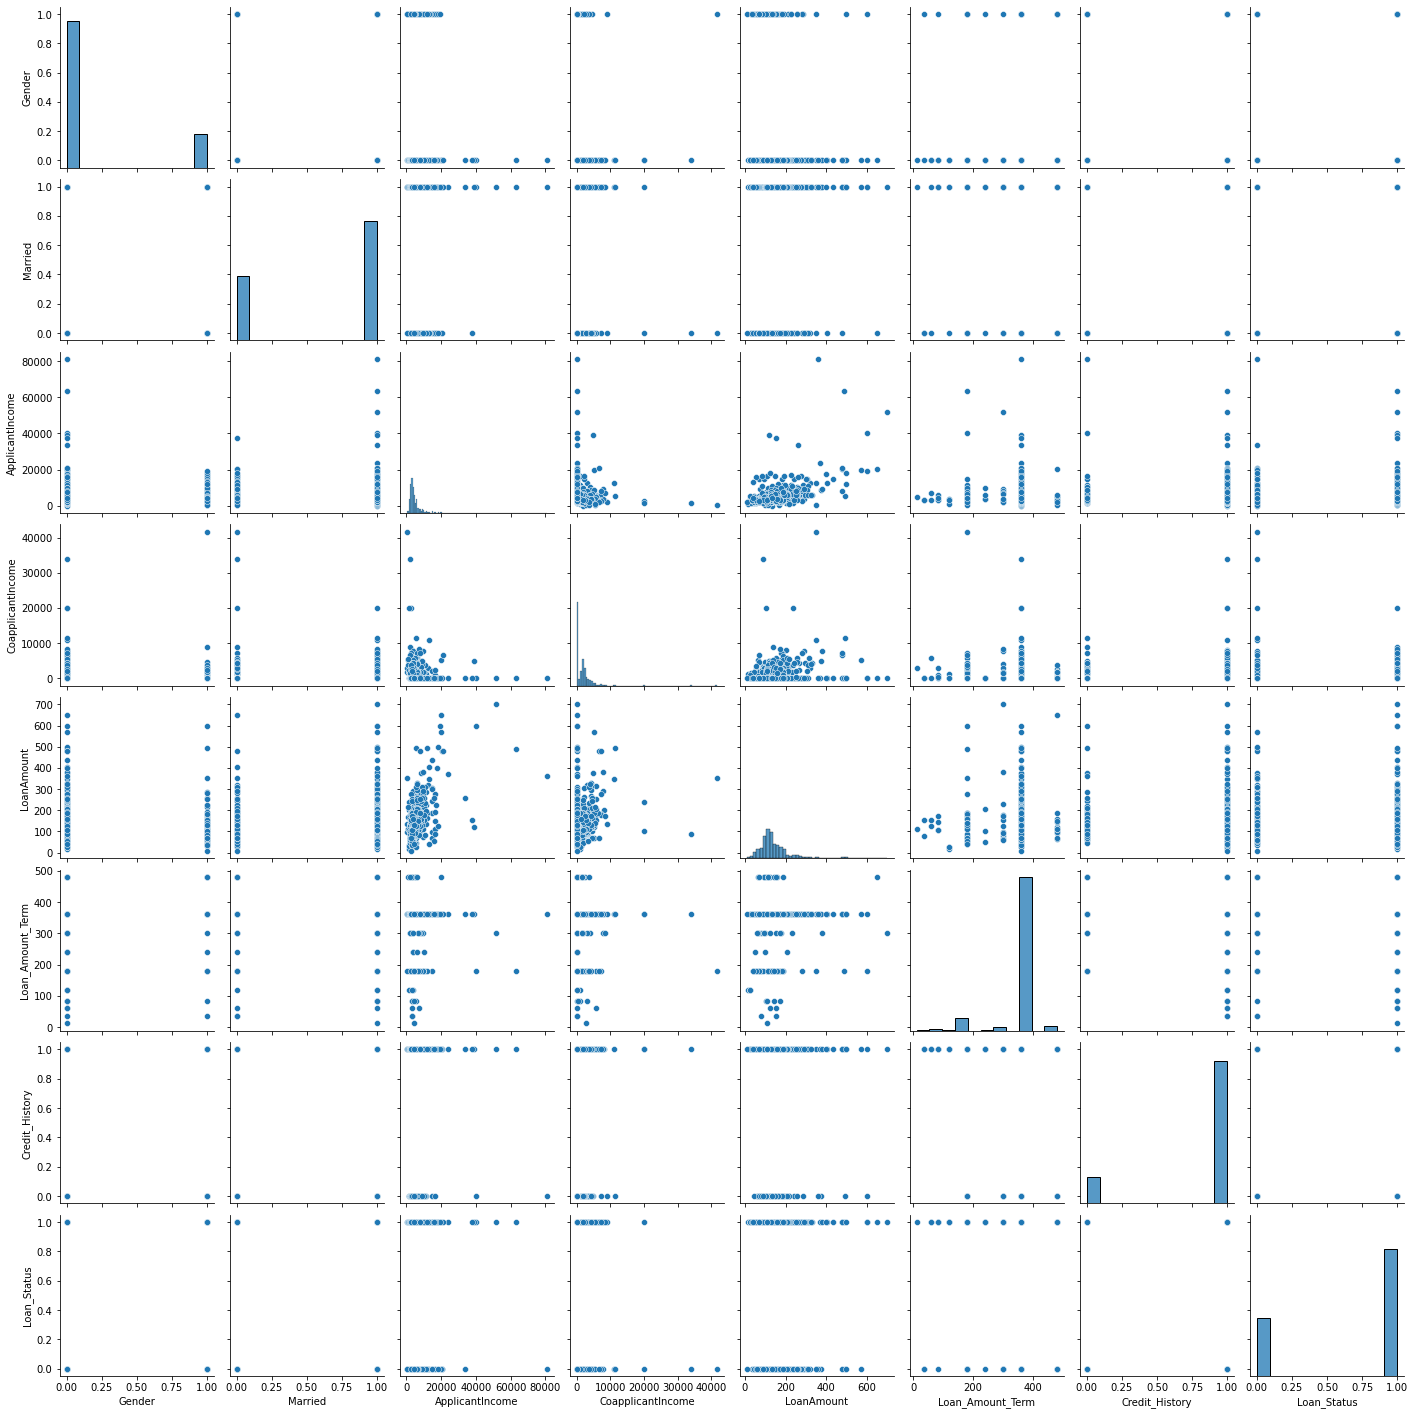

In [ ]:
sns.pairplot(df)

In [ ]:
cat = df.select_dtypes('object').columns. to_list()

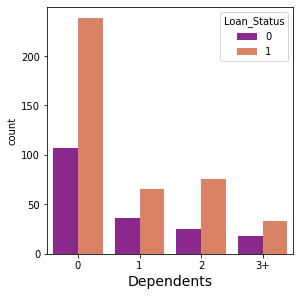

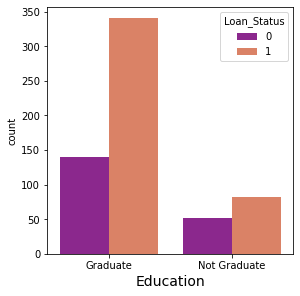

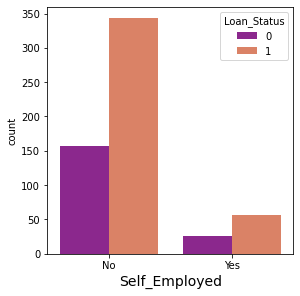

In [ ]:
for i in cat[1:-1]:
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue = 'Loan_Status', data = df , palette = 'plasma')
    plt.xlabel(i, fontsize=14 )

In [ ]:
#Filling the missing values

# Gender 
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# Married 
df['Married'] =df['Married'].fillna(df['Married'].mode()[0])

# Dependents
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [ ]:
# Self_Employed 
df['Self_Employed'].fillna('No',inplace=True)

# Credit_History 
df['Credit_History'] =df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# LoanAmount 
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

# Loan_Amount 
df['Loan_Amount_Term'] =df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])


In [ ]:
# Counting the accurance of each value in Gender 
df['Gender'].value_counts()

0.0    502
1.0    112
Name: Gender, dtype: int64

In [ ]:
# Counting the accurance of each value in Dependent 
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
#Counting the occurence of each value with Loan_amount_term 
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

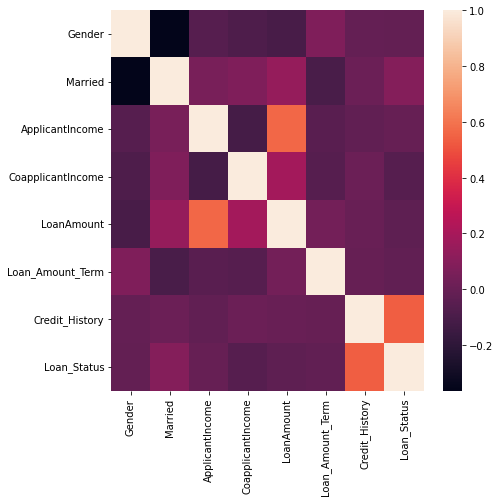

In [ ]:
#Correlation of the dataset
plt.figure(figsize=(7,7))
sns.heatmap(df.corr())

In [ ]:
#Model Building
X = df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount',
'Credit_History']]
y = df.Loan_Status

In [ ]:
# Data Splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,
random_state = 10)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred= model.predict(x_train) 
print("Accuracy: ",accuracy_score(y_pred,y_train))

Accuracy:  0.8126272912423625


**Random forest algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=4, random_state = 10)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=10)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7967479674796748

In [ ]:
y_pred = model.predict(x_train)
print("Accuracy: ",accuracy_score(y_train,y_pred))

Accuracy:  0.8167006109979633


**Decision tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

y_predict = DT.predict(x_test)

# prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.50      0.53      0.51        36
           1       0.80      0.78      0.79        87

    accuracy                           0.71       123
   macro avg       0.65      0.65      0.65       123
weighted avg       0.71      0.71      0.71       123

70.73% Accurate
